In [1]:
import tensorflow as tf
from tensorboard import notebook

ImportError: DLL load failed while importing _pywrap_tfe: The specified module could not be found.

In [2]:
%load_ext tensorboard

Analyse Exploratoire 

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorboard import notebook
import datetime

In [6]:
data_df = pd.read_csv("creditcard.csv")

In [7]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
data_df.shape

(284807, 31)

In [9]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data_df.duplicated().sum()

1081

In [11]:
data_df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [12]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
matrice = data_df.values
colonnes_data = data_df.columns

In [14]:
type(matrice)

numpy.ndarray

In [15]:
matrice

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [16]:
matrice[:5]

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,
         2.53634674e+00,  1.37815522e+00, -3.38320770e-01,
         4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
         3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,
         1.46817697e+00, -4.70400525e-01,  2.07971242e-01,
         2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
        -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01,
         1.66480113e-01,  4.48154078e-01,  6.00176493e-02,
        -8.23608088e-02, -7.88029833e-02,  8.51016549e-02,
        -2.55425128e-01, -1.66974414e-01,  1.61272666e+00,
         1.06523531e+00,  4.89095016e-01, -1.43772296e-01,
         6.35558093e-01,  4.63917041e-01, -1.14804663e-01,
        -1.83361270e-01, -1.45

In [17]:
Loi_N = StandardScaler()

In [18]:
Loi_N.fit(matrice)

StandardScaler()

In [19]:
centre_reduite = Loi_N.transform(matrice)
centre_reduite[:5]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426,
        -0.04159898],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
         0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
        -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
         0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
        -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
         0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454,
        -0.04159898],
       [-1.99656197, -0.69350046, -0.81157783,  1.16946849,  0.26823129,
       

In [20]:
moy_std = ["mean", "std"]
pd.DataFrame(centre_reduite).describe().round(2).loc[moy_std, :]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
colonne = data_df.shape[1]

In [22]:
acp = PCA(n_components=colonne)


In [23]:
acp.fit(centre_reduite)

PCA(n_components=31)

In [24]:
var =(acp.explained_variance_ratio_*100).round(2)

In [25]:
var

array([6.32, 5.57, 5.42, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23,
       3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 3.23,
       3.23, 3.23, 3.23, 3.23, 3.23, 3.23, 1.02, 0.9 , 0.14])

In [26]:
var_cum = var.cumsum()

In [27]:
var_cum

array([  6.32,  11.89,  17.31,  20.54,  23.77,  27.  ,  30.23,  33.46,
        36.69,  39.92,  43.15,  46.38,  49.61,  52.84,  56.07,  59.3 ,
        62.53,  65.76,  68.99,  72.22,  75.45,  78.68,  81.91,  85.14,
        88.37,  91.6 ,  94.83,  98.06,  99.08,  99.98, 100.12])

In [28]:
nv_var = [f"F{i}" for i in range(1, colonne+1)]

In [29]:
nv_var

['F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30',
 'F31']

Text(0.5, 1.0, 'Graphique des valeurs propres')

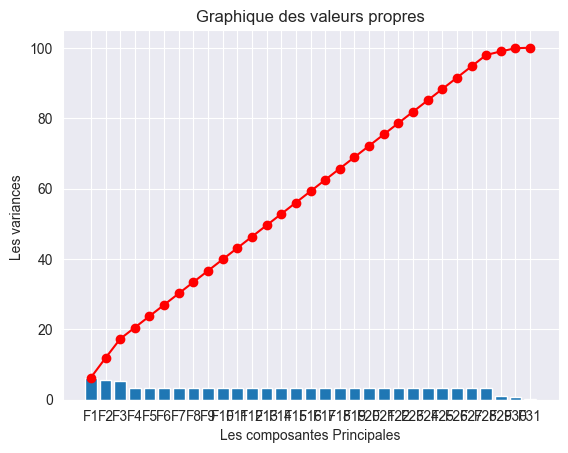

In [30]:
plt.bar(nv_var, var)
plt.plot(nv_var,var_cum, c='red', marker = 'o')
plt.xlabel('Les composantes Principales')
plt.ylabel('Les variances ')
plt.title('Graphique des valeurs propres')

In [31]:
f_com = acp.components_

In [32]:
df_f_com = pd.DataFrame(f_com)

In [33]:
df_f_com.columns =data_df.columns
df_f_com.index = nv_var

In [34]:
df_f_com.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31
Time,-0.030340,-0.207317,0.675300,6.302679e-15,-8.808816e-128,0.000000e+00,-7.384252e-99,-4.305479e-128,-3.521775e-113,-0.000000e+00,...,0.000000e+00,-1.031410e-55,-0.000000e+00,4.365823e-70,-2.774672e-128,-0.000000e+00,2.862065e-15,-0.707095,0.008941,-0.002195
V1,-0.173167,-0.122011,0.079440,7.031241e-02,1.856033e-02,2.208725e-01,-1.273396e-01,-4.718597e-02,-1.016608e-01,1.016040e-02,...,-5.038120e-02,3.458272e-03,1.850368e-01,-1.013967e-01,4.434072e-01,-3.381686e-01,-4.126791e-02,0.118303,-0.101785,-0.167203
V2,-0.390008,0.102421,0.000193,-2.931969e-02,-2.248479e-01,-3.475720e-01,1.776874e-01,-4.412835e-01,1.354838e-01,-8.671246e-03,...,1.651880e-01,1.983489e-01,8.806216e-02,1.440122e-02,-6.628788e-02,-9.435269e-02,-1.694652e-02,-0.010793,0.086900,-0.392883
V3,-0.145187,-0.054584,-0.480739,-9.441264e-02,6.375308e-02,-1.354836e-01,6.921890e-02,-1.126547e-01,3.463605e-02,1.233693e-01,...,-2.056337e-01,-4.235915e-01,-2.539652e-02,-8.812228e-02,-2.885437e-02,7.368412e-03,8.631332e-02,-0.438742,-0.184742,-0.155445
V4,0.078198,0.151948,-0.061826,-7.740704e-02,5.382919e-02,4.615277e-02,2.630957e-02,-7.739324e-02,4.145934e-02,-1.362998e-01,...,3.548188e-01,-5.760020e-03,2.616092e-03,-1.794722e-02,-3.711772e-01,3.145050e-01,5.670983e-02,-0.105500,0.132429,0.071820
V5,-0.291788,-0.127723,0.131736,1.044954e-01,-2.116382e-01,2.630673e-01,2.413721e-01,1.356539e-01,-1.422240e-01,2.856762e-01,...,-1.109414e-01,3.727617e-02,-2.228225e-01,2.635448e-01,-3.043964e-01,9.329218e-02,-6.747717e-02,0.175436,-0.097012,-0.284231
V6,0.160541,-0.028504,-0.068899,-2.945457e-02,-1.691628e-01,5.544643e-01,1.670030e-01,-3.236413e-01,1.309230e-01,-1.938316e-02,...,8.163983e-02,2.066787e-02,-2.703615e-01,-2.034962e-01,-5.102115e-02,4.697207e-02,4.443713e-02,-0.065344,-0.040889,0.159566
V7,0.287307,-0.209557,0.040753,1.013090e-01,-1.069460e-01,-1.909309e-01,2.555844e-01,-3.440770e-01,-1.644775e-02,4.494772e-01,...,-6.034476e-02,3.288586e-02,1.310520e-01,2.840981e-01,2.155734e-01,2.152726e-01,-6.079701e-02,0.084812,-0.182425,0.294653
V8,-0.074513,0.031855,-0.033981,-3.053572e-02,-2.401765e-01,1.062468e-01,-5.784946e-03,-3.042133e-01,-3.724505e-01,-3.239709e-01,...,-1.431448e-01,-2.162055e-01,-2.298236e-01,1.785347e-02,1.946761e-01,1.765983e-01,2.109112e-02,-0.038114,0.019410,-0.076302
V9,-0.033867,-0.087543,-0.039034,9.242097e-02,1.535754e-01,-1.407073e-02,1.581113e-01,4.814147e-02,4.692771e-02,-4.033274e-02,...,2.575536e-01,-1.692033e-01,-1.046544e-01,1.200474e-01,2.337977e-01,-1.347482e-01,3.472768e-02,-0.011270,-0.095788,-0.032079


<Axes: >

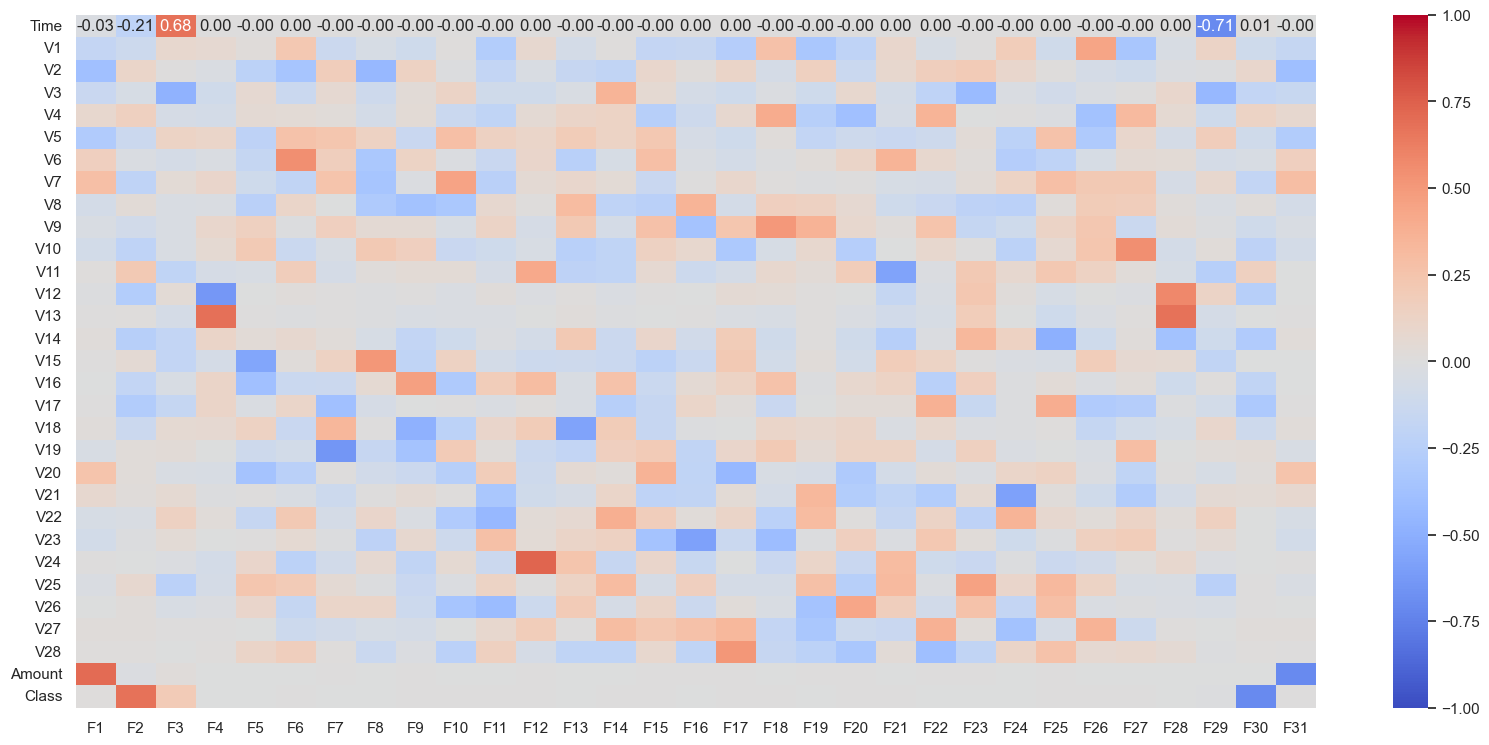

In [35]:
sns.set()
fig, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(df_f_com.T, vmin=-1, vmax=1,annot=True, cmap="coolwarm",  fmt="0.2f")

In [36]:
df_f_com

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
F1,-3.033981e-02,-0.173167,-0.390008,-0.145187,0.078198,-0.291788,0.160541,0.287307,-0.074513,-0.033867,...,0.077358,-0.052320,-0.084696,0.004194,-0.027836,-0.000985,0.021687,0.008009,7.065136e-01,1.493038e-02
F2,-2.073167e-01,-0.122011,0.102421,-0.054584,0.151948,-0.127723,-0.028504,-0.209557,0.031855,-0.087543,...,0.022102,-0.038658,-0.014100,-0.002254,0.070932,0.016069,0.017100,0.011312,-1.941026e-02,6.773966e-01
F3,6.753005e-01,0.079440,0.000193,-0.480739,-0.061826,0.131736,-0.068899,0.040753,-0.033981,-0.039034,...,0.059735,0.141340,0.046522,-0.018063,-0.232033,-0.039907,0.001018,-0.006197,2.101951e-02,2.021555e-01
F4,6.302679e-15,0.070312,-0.029320,-0.094413,-0.077407,0.104495,-0.029455,0.101309,-0.030536,0.092421,...,-0.008320,0.029941,-0.003868,-0.073153,-0.064204,-0.016023,0.004747,0.015366,-9.554699e-17,-8.152553e-15
F5,-8.808816e-128,0.018560,-0.224848,0.063753,0.053829,-0.211638,-0.169163,-0.106946,-0.240177,0.153575,...,0.006890,-0.157948,0.004479,0.097918,0.237595,0.096268,-0.007775,0.117092,-7.526434e-16,-1.109214e-15
F6,0.000000e+00,0.220872,-0.347572,-0.135484,0.046153,0.263067,0.554464,-0.190931,0.106247,-0.014071,...,-0.035295,0.218705,0.055442,-0.220587,0.200265,-0.165906,-0.123495,0.170789,-8.924587e-16,1.943543e-15
F7,-7.384252e-99,-0.127340,0.177687,0.069219,0.026310,0.241372,0.167003,0.255584,-0.005785,0.158111,...,-0.119554,-0.066534,-0.010438,-0.091906,0.050211,0.105132,-0.092189,0.013407,3.981683e-16,-1.572691e-15
F8,-4.305479e-128,-0.047186,-0.441284,-0.112655,-0.077393,0.135654,-0.323641,-0.344077,-0.304213,0.048141,...,0.001726,0.100835,-0.218688,0.069610,-0.010855,0.106715,-0.053078,-0.138465,-3.991262e-16,-3.889379e-16
F9,-3.521775e-113,-0.101661,0.135484,0.034636,0.041459,-0.142224,0.130923,-0.016448,-0.372451,0.046928,...,0.053746,-0.026868,0.074487,-0.192262,-0.141202,-0.122063,-0.065350,-0.015982,4.851956e-16,3.585872e-15
F10,-0.000000e+00,0.010160,-0.008671,0.123369,-0.136300,0.285676,-0.019383,0.449477,-0.323971,-0.040333,...,0.014337,-0.290205,-0.111384,0.061406,-0.016046,-0.347366,-0.000125,-0.229728,-6.886799e-16,2.146592e-15


In [37]:
x_y = (0,1)

In [38]:
def correlation_graph(acp, 
                      x_y, 
                      colonnes_data) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    colonnes_data : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, acp.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                acp.components_[x, i],  
                acp.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(acp.components_[x, i] + 0.05, acp.components_[y, i] + 0.05, colonnes_data[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*acp.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*acp.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

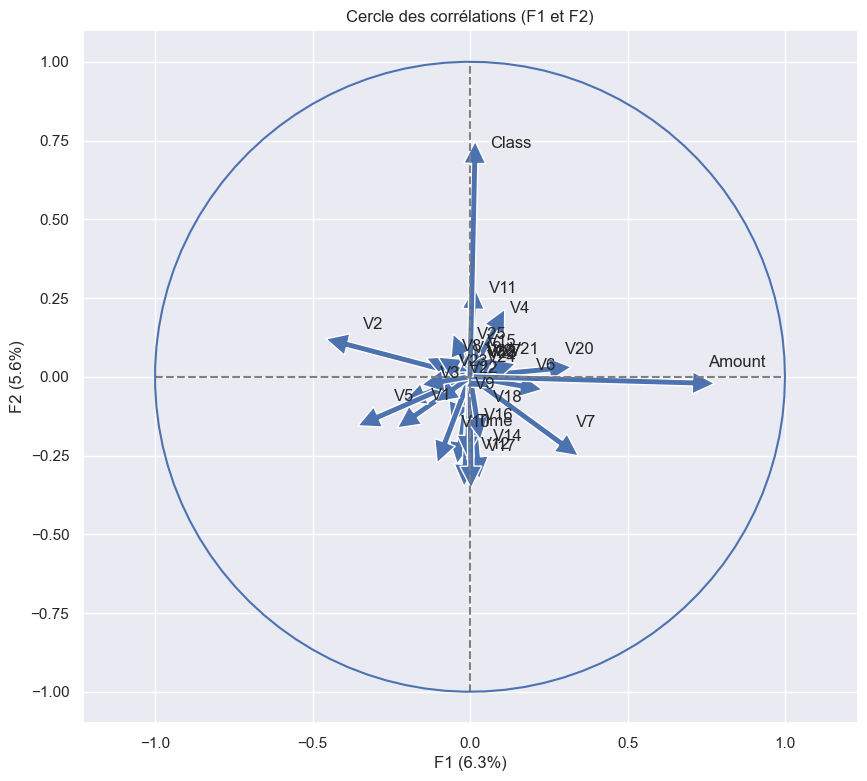

In [39]:
correlation_graph(acp, (x_y), colonnes_data)

In [40]:
data_df.corr().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


ENTRAINEMENT DU MODEL

In [41]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
y = data_df['Class']
x = data_df.drop('Class', axis=1)

In [43]:
scaler = StandardScaler()

In [44]:
X_scaled= scaler.fit_transform(x)

In [45]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

DIVISION DES DONNEES

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
x_train.shape

(227845, 30)

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

In [50]:
X_smote, Y_smote = smote.fit_resample(x_train, y_train)

In [51]:
X_smote.shape

(454902, 30)

In [52]:
import tensorflow as tf

In [53]:
model = tf.keras.Sequential()

In [54]:
model.add(tf.keras.layers.Dense(units=15, activation="relu", kernel_initializer="uniform", input_dim=x.shape[1]))

In [55]:
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                465       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="binary_accuracy")

In [58]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [59]:
model.fit(x = X_smote,y =  Y_smote, batch_size=2, epochs=1, validation_data=[x_test, y_test],  callbacks=[tensorboard_callback])

227451/227451 [==============================] - 333s 1ms/step - loss: 0.0300 - binary_accuracy: 0.9907 - val_loss: 0.0290 - val_binary_accuracy: 0.9922


In [60]:
loss, acc = model.evaluate(x_test, y_test)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0290 - binary_accuracy: 0.9922


In [65]:
model.save('fraud_model.h5')

C:\Users\yayab\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
notebook.start("--logdir " + log_dir)


Launching TensorBoard...

In [64]:
loss

0.02901177480816841